In [1]:
import requests
import os.path
import pandas as pd
from ydata_profiling import ProfileReport # pip install ydata-profiling
import matplotlib.pyplot as plt

# Load datasets

In [2]:
if not os.path.isfile('../data/mp_characteristics_V2_19492021.tab'):
    print('Downloading mp_characteristics dataset...')
    with open('../data/mp_characteristics_V2_19492021.tab', 'wb') as out_file:
        content = requests.get('https://dataverse.harvard.edu/api/access/datafile/6402444', stream=True).content
        out_file.write(content)
if not os.path.isfile('../data/vote_characteristics_V2_19492021.tab'):
    print('Downloading vote_characteristics dataset...')
    with open('../data/vote_characteristics_V2_19492021.tab', 'wb') as out_file:
        content = requests.get('https://dataverse.harvard.edu/api/access/datafile/6402442', stream=True).content
        out_file.write(content)
if not os.path.isfile('../data/voting_behavior_V2_19492021.dta'):
    print('Downloading voting_behavior dataset...')
    with open('../data/voting_behavior_V2_19492021.dta', 'wb') as out_file:
        content = requests.get('https://dataverse.harvard.edu/api/access/datafile/6402445', stream=True).content
        out_file.write(content)

mp_char = pd.read_csv('../data/mp_characteristics_V2_19492021.tab', sep='\t')
vote_char = pd.read_csv('../data/vote_characteristics_V2_19492021.tab', sep='\t')
voting_beh = pd.read_stata('../data/voting_behavior_V2_19492021.dta')

# Create profile reports

In [ ]:
mp_char_report = ProfileReport(mp_char)
mp_char_report.to_file('../data/reports/mp_char.html')
vote_char_report = ProfileReport(vote_char)
vote_char_report.to_file('../data/reports/vote_char.html')
voting_beh_report = ProfileReport(voting_beh)
voting_beh_report.to_file('../data/reports/voting_beh.html')

# Inspect dataset samples

In [6]:
mp_char.sample(5)

,id_de_parliament,lastname,firstname,elecper,gender,year_birth,date_birth,date_birth_text,mandate_start,mandate_end,...,whip,partyid_cmp,partyid_ches,partyid_bl,partyid_parlgov,partyid_parlgov2,id_de_parliament_string,mp_id_old,pers_id_pdbd,id_de_manow
11090,11003514.0,Connemann,Gitta,15,0,1964,1964-05-10,10/05/1964,2002-10-17,2005-10-18,...,0,41521.0,301.0,44.0,1727.0,808.0,11003514,153298.0,DE_Connemann_Gitta_1964,153298
3953,11002034.0,Schmitz,Hans,1,1,1896,1896-12-10,10/12/1896,1949-09-07,1953-09-07,...,0,41521.0,NaN,NaN,1727.0,808.0,11002034,8619.0,DE_Schmitz_Hans_1896,8619
2770,11001414.0,Maihofer,Werner,8,1,1918,1918-10-20,20/10/1918,1976-12-14,1980-11-04,...,0,41420.0,NaN,NaN,543.0,NaN,11001414,6089.0,DE_Maihofer_Werner_1918,6089
11831,11004173.0,Tack,Kerstin,18,0,1968,1968-11-11,11/11/1968,2013-10-27,2017-10-23,...,0,41320.0,302.0,NaN,558.0,558.0,11004173,NaN,DE_Tack_Kerstin_1968,172260
5802,11002238.0,Steinhauer,Waltraud,9,0,1925,1925-02-08,08/02/1925,1980-11-04,1983-03-29,...,0,41320.0,NaN,NaN,558.0,NaN,11002238,71542.0,DE_Steinhauer_Waltraud_1925,71542


In [7]:
vote_char.sample(5)

,vote_id,vote_id2,vote_id_elecper,elecper,source,vote_title,vote_type,vote_finalpassage,vote_numproposals,policy1,...,gesta,cabid_parlgov,cabid_erdda,cabinet,cab_start,cab_end,elecper_start,elecper_end,cab_parties,vote_date
845,11127,11127.0,127,11,11/111/8030,Entschlie��ungsantrag der Fraktion Die GR��NEN...,9.0,0,0,3,...,NaN,286.0,622.0,Kohl III,1987-03-11,1990-10-30,1987-01-25,NaN,"CDU/CSU, FDP",1988-11-25
484,7040,7040.0,40,7,07/227/15874,��nderungsantrag der Fraktion der CDU/CSU (Drs...,5.0,0,0,14,...,K16,252.0,616.0,Schmidt I,1974-05-16,1976-10-03,NaN,1976-10-03,"SPD, FDP",1976-03-11
828,11110,11110.0,110,11,11/111/7998,Ziffer 28 des ��nderungsantrags zur zweiten Be...,5.0,0,0,3,...,G36,286.0,622.0,Kohl III,1987-03-11,1990-10-30,1987-01-25,NaN,"CDU/CSU, FDP",1988-11-25
388,5004,5004.0,4,5,05/178/9653,Schlu��abstimmung des Entwurfs eines Siebzehnt...,10.0,1,0,27,...,NaN,170.0,613.0,Kiesinger,1966-12-01,1969-09-28,NaN,1969-09-28,"CDU/CSU, SPD",1968-05-30
2214,19028,19028.0,28,19,19/39/3831,Beschlussempfehlung des Ausw��rtigen Ausschuss...,8.0,0,0,16,...,NaN,1528.0,NaN,Merkel IV,2018-03-14,2021-10-26,2017-10-27,2021-10-26,"CDU/CSU, SPD",2018-06-14


In [9]:
voting_beh.sample(5)

,id_de_parliament,lastname,firstname,party_det,ppg,party_text,elecper,office_spell,vote_id,vote_date,vote_beh,vote_deviate,mp_id_old,pers_id_pdbd,id_de_manow
692052,11003264.0,Willsch,Klaus-Peter,CDU (Christian Democratic Union),CDU/CSU,CDU,19,1.0,19181.0,2020-10-09,unexcused absent,unexcused absent,NaN,DE_Willsch_Klaus_1961,121213
110000,11000859.0,Hellwege,Heinrich,DP (German Party),other,DP,1,2.0,1101.0,1953-03-19,yes,no deviation,3619.0,DE_Hellwege_Heinrich_1908,3619
202698,11001640.0,Oetzel,Richard,CDU (Christian Democratic Union),CDU/CSU,CDU,3,1.0,3001.0,1958-03-25,no,no deviation,7011.0,DE_Oetzel_Richard_1901,7011
1081082,11003582.0,Lips,Patricia,CDU (Christian Democratic Union),CDU/CSU,CDU,19,1.0,19105.0,2019-06-28,yes,no deviation,NaN,DE_Lips_Patricia_1963,152755
802211,11002829.0,Wöhrl,Dagmar,CSU (Christian Social Union),CDU/CSU,CSU,17,1.0,17107.0,2011-02-24,no,no deviation,130924.0,DE_Woehrl_Dagmar_1954,130924


# Voting behavior analysis

For the classification we only need the "Voting behavior" table. In the following, we will therefore analyse the values of that table that are used in the classification in detail.

### Reduce dataset

In [3]:
# including votes only from the last election period
reduced = voting_beh.loc[voting_beh['vote_date'] > '2017-10-24']

# reducing columns (specify columns to keep)
reduced = reduced[['id_de_parliament', 'party_text', 'vote_id', 'vote_beh']]

# convert voting behavior from categorial value to string
reduced['vote_beh'] = reduced['vote_beh'].astype(str)

display(reduced)

,id_de_parliament,party_text,vote_id,vote_beh
320229,11001938.0,CDU,19022.0,yes
320230,11001938.0,CDU,19232.0,yes
320234,11001938.0,CDU,19146.0,no
320237,11001938.0,CDU,19177.0,yes
320251,11001938.0,CDU,19065.0,unexcused absent
...,...,...,...,...
1435244,11004971.0,AfD,19242.0,yes
1435245,11004971.0,AfD,19243.0,no
1435246,11004972.0,Linke,19243.0,no
1435247,11004972.0,Linke,19242.0,no


## Distribution of voting behavior

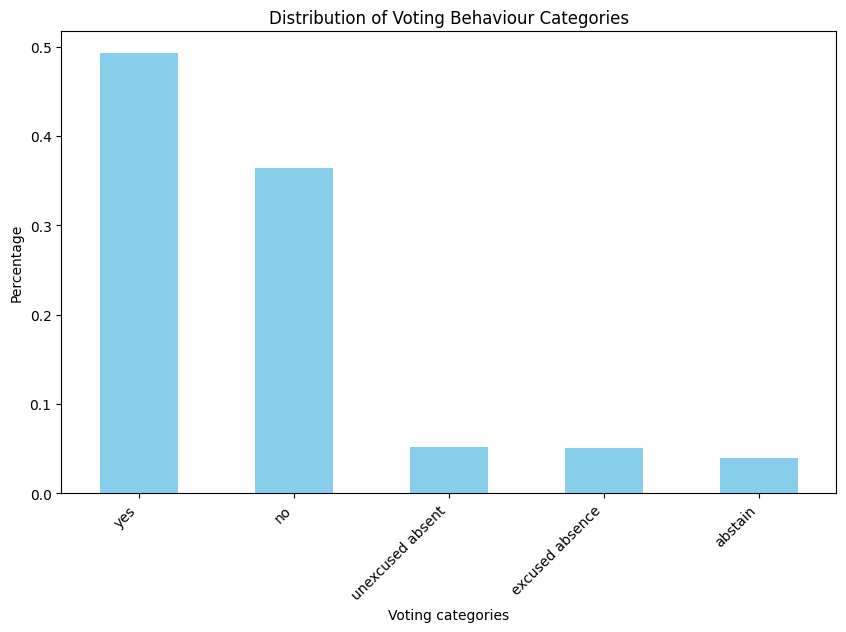

In [17]:
plt.figure(figsize=(10, 6))
ax = reduced['vote_beh'].value_counts(normalize=True).plot(kind='bar', color='skyblue')
ax.set_title('Distribution of Voting Behaviour Categories')
ax.set_xlabel('Voting categories')
ax.set_ylabel('Percentage')

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

plt.show()

## Distribution of parties

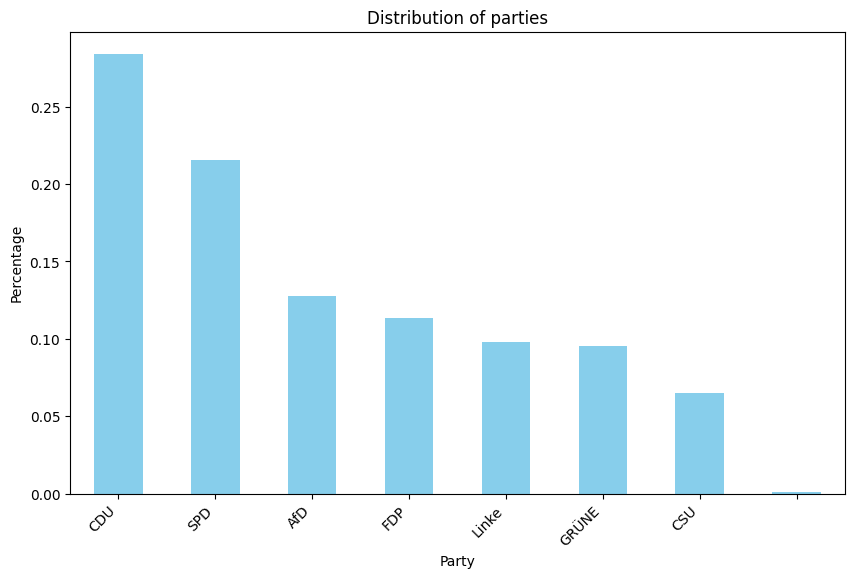

In [18]:
plt.figure(figsize=(10, 6))
ax = reduced['party_text'].value_counts(normalize=True).plot(kind='bar', color='skyblue')
ax.set_title('Distribution of parties')
ax.set_xlabel('Party')
ax.set_ylabel('Percentage')

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

plt.show()

There are four MPs that don't belong to a party:

In [22]:
reduced[reduced['party_text']=='']['id_de_parliament'].unique()

array([11004388., 11004191., 11004174., 11004295.], dtype=float32)

remove them from the dataset:

In [8]:
reduced = reduced[reduced['party_text']!='']

## Transform dataset

In [9]:
transformed = reduced.copy()

# set the datatype of the ID from float64 to int (int64)
transformed[['id_de_parliament']] = transformed[['id_de_parliament']].astype(int)
transformed[['vote_id']] = transformed[['vote_id']].astype(int)

# pivots the dataset so that there is only one sample for each MP with attributes for each vote holding the respective voting behaviour
transformed = transformed.pivot(index=['id_de_parliament', 'party_text'], columns=['vote_id'], values=['vote_beh'])

# reset the index to be able to access data as usually
transformed = transformed.reset_index()

# remove mp_id (not necessary for classification)
transformed = transformed.drop('id_de_parliament', axis=1)

# make column index flat / non-hierarchical and format name
transformed.columns = transformed.columns.to_flat_index()
transformed.columns = transformed.columns.map(lambda x: str(x).replace('(', ''))
transformed.columns = transformed.columns.map(lambda x: str(x).replace('\'', ''))
transformed.columns = transformed.columns.map(lambda x: str(x).replace(', )', ''))
transformed.columns = transformed.columns.map(lambda x: str(x).replace('beh, ', ''))
transformed.columns = transformed.columns.map(lambda x: str(x).replace(')', ''))

display(transformed)

C:\Users\mogra\AppData\Local\Temp\ipykernel_33748\3663080274.py:14: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  transformed = transformed.drop('id_de_parliament', axis=1)


,party_text,vote_19001,vote_19002,vote_19003,vote_19004,vote_19005,vote_19006,vote_19007,vote_19008,vote_19009,...,vote_19235,vote_19236,vote_19237,vote_19238,vote_19239,vote_19240,vote_19241,vote_19242,vote_19243,vote_19244
0,CDU,yes,yes,yes,yes,yes,yes,yes,yes,no,...,yes,yes,yes,yes,yes,yes,no,yes,yes,yes
1,SPD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,yes,yes,yes,yes,yes,yes,no,excused absence,excused absence,unexcused absent
2,Linke,no,no,no,no,no,no,no,no,yes,...,no,no,no,no,no,no,no,abstain,no,no
3,CDU,yes,yes,yes,yes,yes,yes,yes,yes,no,...,yes,yes,yes,yes,yes,yes,no,yes,yes,excused absence
4,Linke,excused absence,excused absence,excused absence,excused absence,excused absence,unexcused absent,unexcused absent,unexcused absent,excused absence,...,no,no,no,no,no,no,no,abstain,no,excused absence
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
740,FDP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,no,no,no,yes,yes,no,no,yes,no,no
741,GRÜNE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,yes,no,no,yes,yes,yes,no,yes,no,no
742,CDU,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yes,yes,yes
743,AfD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yes,no,no


# Analyse NaNs

In [18]:
# Total number of NaNs
print("Total number of possible votes:", transformed.shape[0]*(transformed.shape[1]-1))
print("Total number of NaNs:", transformed.isna().sum().sum())
print("Total fraction of NaNs", (transformed.isna().sum().sum())/(transformed.shape[0]*(transformed.shape[1]-1)))

Total number of possible votes: 181780
Total number of NaNs: 10170
Total fraction of NaNs 0.055946748817251625


About 5% of all values are NaNs.

NaNs per party:

In [52]:
# Calculate number of NaNs per party
transformed_isna = transformed[transformed.columns[1:]].isna()
transformed_isna = pd.concat([transformed['party_text'],transformed_isna], axis=1)
transformed_grouped = transformed_isna.groupby('party_text', as_index=False).sum()
transformed_grouped['party_sum'] = transformed_grouped[transformed.columns[1:]].sum(axis=1)
transformed_grouped

,party_text,vote_19001,vote_19002,vote_19003,vote_19004,vote_19005,vote_19006,vote_19007,vote_19008,vote_19009,...,vote_19236,vote_19237,vote_19238,vote_19239,vote_19240,vote_19241,vote_19242,vote_19243,vote_19244,party_sum
0,AfD,1,1,1,1,1,1,1,1,1,...,5,5,5,5,5,5,5,5,5,749
1,CDU,12,12,12,12,12,12,12,12,12,...,12,12,12,12,12,12,12,12,12,2933
2,CSU,3,3,3,3,3,3,3,3,3,...,4,4,4,4,4,4,4,4,4,771
3,FDP,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,1226
4,GRÜNE,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,1220
5,Linke,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,488
6,SPD,10,10,10,10,10,10,10,10,10,...,13,13,13,13,13,13,14,14,14,2783


C:\Users\mogra\AppData\Local\Temp\ipykernel_33748\2478687882.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


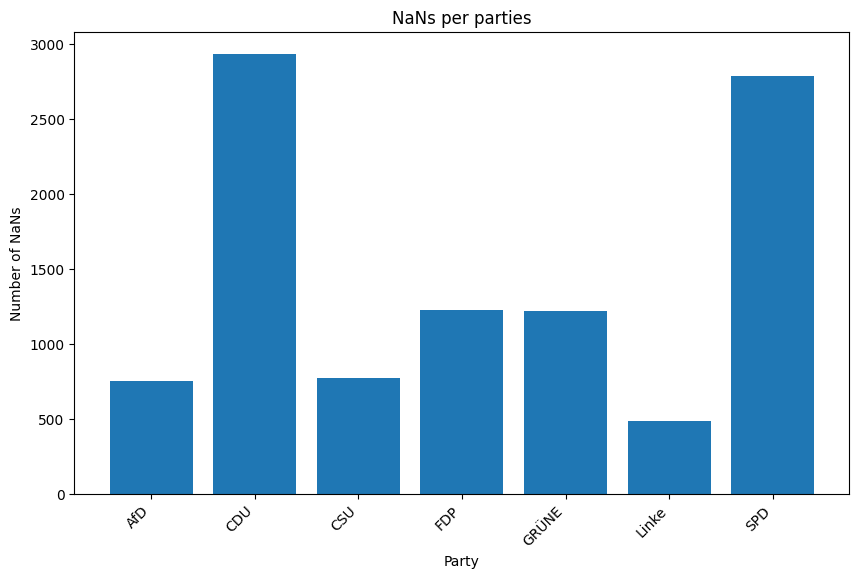

In [53]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
ax.bar(transformed_grouped['party_text'], transformed_grouped['party_sum'])
ax.set_title('NaNs per parties')
ax.set_xlabel('Party')
ax.set_ylabel('Number of NaNs')

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

plt.show()

Number of NaNs in relation to their party size.

In [69]:
# Calculate number of NaNs per party in relation to their party size, so the average number of NaNs per MP for each party.
transformed_isna = transformed[transformed.columns[1:]].isna()
transformed_isna = pd.concat([transformed['party_text'],transformed_isna], axis=1)
transformed_isna['party_size'] = 1
transformed_grouped = transformed_isna.groupby('party_text', as_index=False).sum()
transformed_grouped['party_rel'] = transformed_grouped[transformed.columns[1:-1]].sum(axis=1) / (transformed_grouped['party_size'])
transformed_grouped

,party_text,vote_19001,vote_19002,vote_19003,vote_19004,vote_19005,vote_19006,vote_19007,vote_19008,vote_19009,...,vote_19237,vote_19238,vote_19239,vote_19240,vote_19241,vote_19242,vote_19243,vote_19244,party_size,party_rel
0,AfD,1,1,1,1,1,1,1,1,1,...,5,5,5,5,5,5,5,5,93,8.000000
1,CDU,12,12,12,12,12,12,12,12,12,...,12,12,12,12,12,12,12,12,212,13.778302
2,CSU,3,3,3,3,3,3,3,3,3,...,4,4,4,4,4,4,4,4,49,15.653061
3,FDP,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,85,14.364706
4,GRÜNE,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,72,16.875000
5,Linke,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,71,6.845070
6,SPD,10,10,10,10,10,10,10,10,10,...,13,13,13,13,13,14,14,14,163,16.987730


C:\Users\mogra\AppData\Local\Temp\ipykernel_33748\1930258179.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


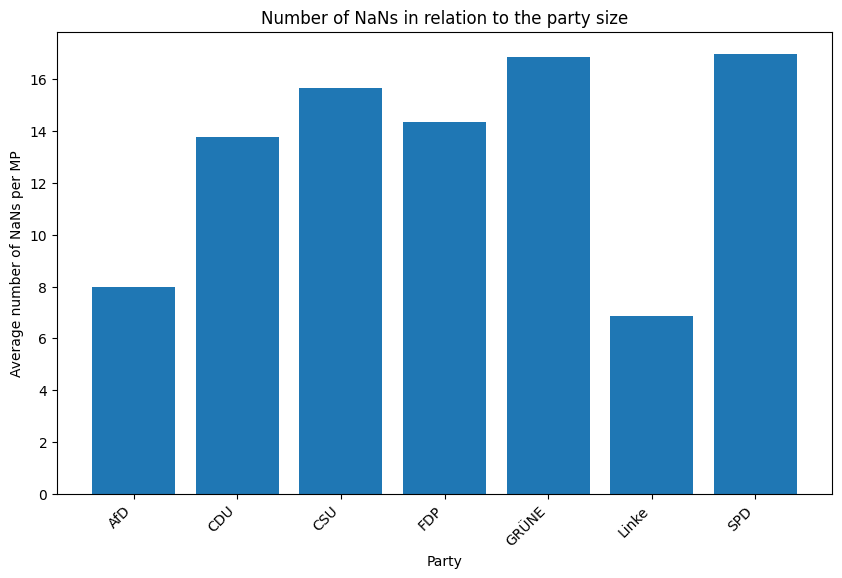

In [70]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
ax.bar(transformed_grouped['party_text'], transformed_grouped['party_rel'])
ax.set_title('Number of NaNs in relation to the party size')
ax.set_xlabel('Party')
ax.set_ylabel('Average number of NaNs per MP')

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

plt.show()

# Archive

## Plot distribution of voting behaviour categories

[Text(0, 0, 'yes'),
 Text(1, 0, 'no'),
 Text(2, 0, 'excused absence'),
 Text(3, 0, 'unexcused absent'),
 Text(4, 0, 'abstain'),
 Text(5, 0, 'voting behavior not/wrongly protocolled'),
 Text(6, 0, 'invalid vote')]

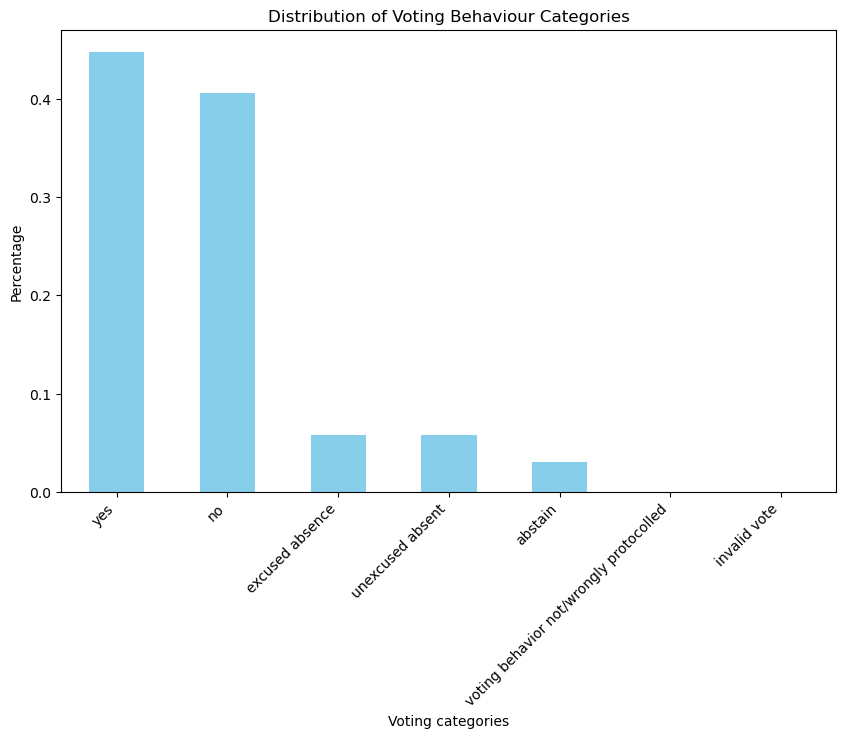

In [12]:
plt.figure(figsize=(10, 6))
ax = voting_beh['vote_beh'].value_counts(normalize=True).plot(kind='bar', color='skyblue')
ax.set_title('Distribution of Voting Behaviour Categories')
ax.set_xlabel('Voting categories')
ax.set_ylabel('Percentage')

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

## Plot distribution of parties

[Text(0, 0, 'SPD'),
 Text(1, 0, 'CDU'),
 Text(2, 0, 'FDP'),
 Text(3, 0, 'CSU'),
 Text(4, 0, 'Linke'),
 Text(5, 0, 'GRÜNE'),
 Text(6, 0, 'CDU '),
 Text(7, 0, 'B90/GR'),
 Text(8, 0, 'AfD'),
 Text(9, 0, 'Grüne'),
 Text(10, 0, 'Linke/PDS'),
 Text(11, 0, 'DP'),
 Text(12, 0, 'GB/BHE'),
 Text(13, 0, 'FU'),
 Text(14, 0, 'KPD'),
 Text(15, 0, 'DA/FVP'),
 Text(16, 0, 'WAV'),
 Text(17, 0, ''),
 Text(18, 0, 'BP'),
 Text(19, 0, 'BHE/DG'),
 Text(20, 0, 'ZENTRUM'),
 Text(21, 0, 'DRP')]

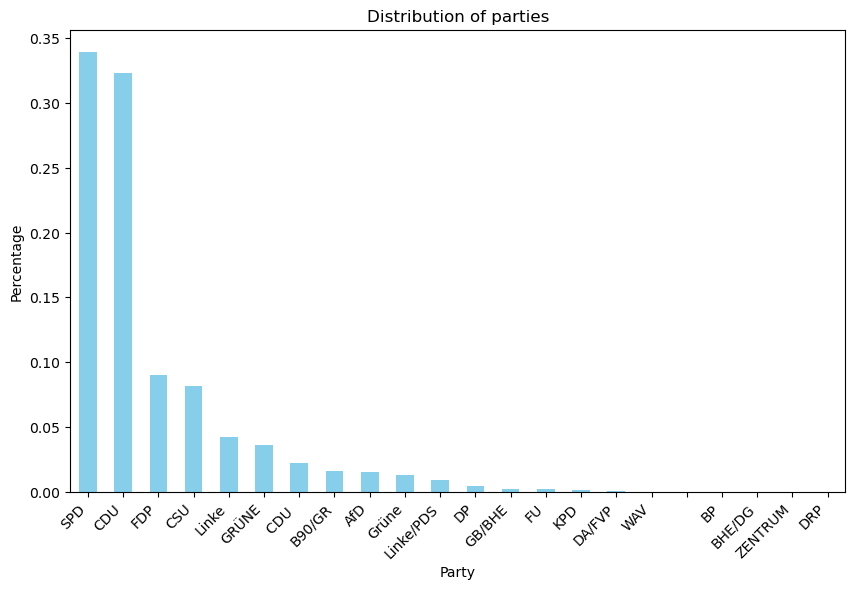

In [13]:
plt.figure(figsize=(10, 6))
ax = voting_beh['party_text'].value_counts(normalize=True).plot(kind='bar', color='skyblue')
ax.set_title('Distribution of parties')
ax.set_xlabel('Party')
ax.set_ylabel('Percentage')

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

## Missing values

In [14]:
voting_beh.isna().sum()

id_de_parliament         0
lastname                 0
firstname                0
party_det              145
ppg                    145
party_text               0
elecper                  0
office_spell           145
vote_id                  0
vote_date                0
vote_beh                 0
vote_deviate            64
mp_id_old           307856
pers_id_pdbd             0
id_de_manow              0
dtype: int64

In [16]:
vote_char.isna().sum()

vote_id              0
vote_id2             0
vote_id_elecper      0
elecper              0
source               0
                  ... 
cab_end              0
elecper_start      211
elecper_end        385
cab_parties          0
vote_date            0
Length: 65, dtype: int64

In [15]:
mp_char.isna().sum()

id_de_parliament               0
lastname                       0
firstname                      0
elecper                        0
gender                         0
year_birth                     0
date_birth                     1
date_birth_text                0
mandate_start                  0
mandate_end                    0
office_spell                   0
spell_start                    0
spell_end                      0
party_elec                     0
party_elecdet                  0
mandate                        0
mandate_detailed               0
dualcand                       0
district_id                 1463
districtvote                6595
closeness_district          1463
list                        2195
listpos                     2511
listpos_total               2623
elecsafe_district           1782
elecsafe_list               1782
elecsafe_overall            1782
minister                       0
junminister                    0
parlpres                       0
commchair 

## Merge and look for correlations

In [17]:
# merging voting_beh and mp_char as btvote
btvote = pd.merge(voting_beh, mp_char, on=['id_de_parliament', 'elecper', 'office_spell'], how='left', suffixes=['_DROP',''])

# merging vote_char and btvote
btvote = pd.merge(btvote, vote_char, on=['vote_id'], suffixes=['_DROP',''])

# droping duplicate columns
btvote.drop(btvote.filter(regex='_DROP$').columns, axis=1, inplace=True)

btvote.head()

,id_de_parliament,party_det,ppg,party_text,office_spell,vote_id,vote_beh,vote_deviate,lastname,firstname,...,gesta,cabid_parlgov,cabid_erdda,cabinet,cab_start,cab_end,elecper_start,elecper_end,cab_parties,vote_date
0,11000001.0,CDU (Christian Democratic Union),CDU/CSU,CDU,1.0,11106.0,no,no deviation,Abelein,Manfred,...,G36,286.0,622.0,Kohl III,1987-03-11,1990-10-30,1987-01-25,NaT,"CDU/CSU, FDP",1988-11-25
1,11000017.0,SPD (Social Democratic Party of Germany),SPD,SPD,1.0,11106.0,abstain,weak deviation,Ahrens,Karl,...,G36,286.0,622.0,Kohl III,1987-03-11,1990-10-30,1987-01-25,NaT,"CDU/CSU, FDP",1988-11-25
2,11000043.0,SPD (Social Democratic Party of Germany),SPD,SPD,2.0,11106.0,abstain,weak deviation,Apel,Hans,...,G36,286.0,622.0,Kohl III,1987-03-11,1990-10-30,1987-01-25,NaT,"CDU/CSU, FDP",1988-11-25
3,11000089.0,FDP (Free Democratic Party),FDP,FDP,1.0,11106.0,excused absence,excused absence,Bangemann,Martin,...,G36,286.0,622.0,Kohl III,1987-03-11,1990-10-30,1987-01-25,NaT,"CDU/CSU, FDP",1988-11-25
4,11000111.0,FDP (Free Democratic Party),FDP,FDP,1.0,11106.0,no,no deviation,Baum,Gerhart Rudolf,...,G36,286.0,622.0,Kohl III,1987-03-11,1990-10-30,1987-01-25,NaT,"CDU/CSU, FDP",1988-11-25


In [ ]:
import seaborn as sns
df = pd.merge(btvote.loc['party_text'], btvote.loc['vote_beh'])
ax = sns.heatmap(df.corr(), annot=True)

In [10]:
voting_beh.describe()

,id_de_parliament,elecper,office_spell,vote_id,mp_id_old
count,1.435249e+06,1.435249e+06,1.435104e+06,1.435249e+06,1.127393e+06
mean,1.100244e+07,1.287517e+01,1.084319e+00,1.431564e+04,8.851391e+04
std,2.254169e+05,5.314821e+00,3.074604e-01,1.389731e+04,5.817338e+04
min,1.100000e+07,1.000000e+00,1.000000e+00,1.001000e+03,1.000000e+01
25%,1.100126e+07,1.100000e+01,1.000000e+00,1.101200e+04,1.002600e+04
50%,1.100248e+07,1.400000e+01,1.000000e+00,1.407800e+04,1.008120e+05
75%,1.100366e+07,1.700000e+01,1.000000e+00,1.721700e+04,1.329130e+05
max,1.100497e+07,1.900000e+01,5.000000e+00,1.811540e+05,1.828320e+05
